In [1]:
import matplotlib.pyplot as plt
import random
%matplotlib inline

In this notebook we will use the Monte Carlo method to find the area under a curve, so first let's define a function
$$f(x) = x^2-4x+5$$

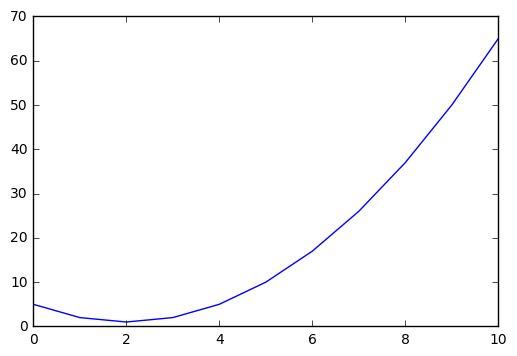

In [2]:
f = lambda x:x**2-4*x+5
x = range(0, 11, 1)
y = [f(v) for v in x]
plt.plot(y)

Now, we know the probability of a random point being below the curve is equal to 
 $$P_{curve}=\dfrac{A_{curve}}{A_{rectanle}}$$
Where $A_{rectangle}$ is the area of the plot in the given interval, so let's try to integrate it from 0 to 10

In [3]:
#Will use 3000 points
number_points=3000
#We want to see the points
points=[]
below=0
for p in range(0, number_points):
    x,y=(random.uniform(0,10), random.uniform(0, 70))
    # If the function for x is greater then the random y, then the point is under the curve
    if f(x) >= y:
        below +=1
    points.append((x,y))
ratio = below/number_points

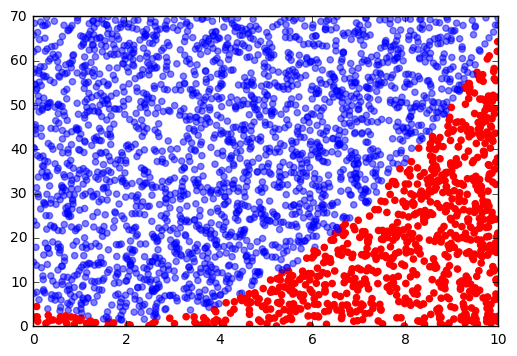

Ratio of points under the curve: 0.2713
Approximated area under the curve: 189.9333


In [4]:
color_func = lambda x,y: (1,0,0) if f(x)>=y else (0,0,1,0.5)
colors = [color_func(x,y) for (x,y) in points]
plt.ylim(0,70)
plt.xlim(0,10)
plt.scatter(*zip(*points), color=colors)
plt.show()
print("Ratio of points under the curve: %.4f" % ratio)
print("Approximated area under the curve: %.4f" % (ratio*700))

Knowing the ratio of points under the curve, we can now calculate the integral as 
$$P_{curve}A_{rectangle} = A_{cruve}$$
If we take the integral
$$\int_0^{10}x^2-4x+5$$
We have $$\dfrac{x^3}{3}-2x^2+5x\big\lvert_0^{10} = \dfrac{10^3}{3}-200+50 = 333.33 - 200 + 50 = 183.33$$
Which is close to the real area, now, let's see how many points we need

In [74]:
def monte_carlo_integration(f, number_points, xlims, ylims):
    below=0
    for p in range(0, number_points):
        x,y=(random.uniform(*xlims), random.uniform(*ylims))
        # If the function for x is greater then the random y, then the point is under the curve
        if f(x) >= y:
            below +=1
    ratio = below/number_points
    area = ratio * (xlims[1]-xlims[0]) * (ylims[1]-ylims[0])
    return (ratio, area)

In [84]:
total_points = 10000
step = 100
estimated = [monte_carlo_integration(f, i, (0,10), (0,70))[1]
for i in range(1,total_points, step)]
mean = sum(estimated)/len(estimated)
print("Mean Approximated value %.4f" % mean)

Mean Approximated value 189.0175


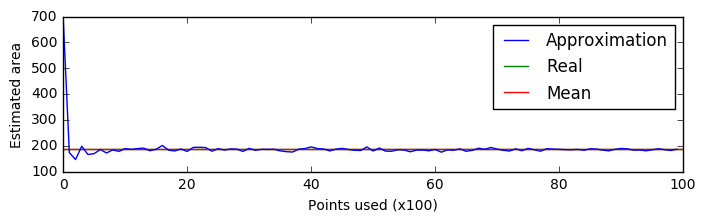

In [89]:
plt.figure(figsize=(8,2))
plt.plot(estimated)
plt.hlines(188.3, 0, total_points/step, 'g')
plt.hlines(mean, 0 , total_points/step, 'r')
plt.legend(['Approximation', 'Real', 'Mean'])
plt.ylabel("Estimated area")
plt.xlabel("Points used (x100)")

As we can see the more points we sample, the more accurate our approximation is to the real values